In [98]:
import sys

# 코랩의 경우 깃허브 저장소로부터 python_environment_check.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
else:
    sys.path.insert(0, '..')

--2024-03-07 11:30:18--  https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1629 (1.6K) [text/plain]
Saving to: ‘python_environment_check.py.1’

python_environment_ 100%[===================>]   1.59K  --.-KB/s    in 0s      

2024-03-07 11:30:18 (14.7 MB/s) - ‘python_environment_check.py.1’ saved [1629/1629]



In [99]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.25.2
[OK] scipy 1.11.4
[OK] matplotlib 3.7.1
[OK] sklearn 1.2.2
[OK] pandas 1.5.3


In [100]:
from IPython.display import Image

In [101]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_01.png', width=500)

In [102]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_02.png', width=500)

In [103]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_03.png', width=300)

In [104]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_04.png', width=300)

강화학습

In [105]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_05.png', width=300)


In [106]:
# 비지도 학습

In [107]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_06.png', width=300)

In [108]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_07.png', width=500)

In [109]:
# 로드맵

In [110]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch01/figures/01_09.png', width=700)

In [111]:
# 뉴런

In [112]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch02/figures/02_02.png', width=500)

In [113]:
# 퍼셉트론 : 단일 신경망...

In [114]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch02/figures/02_03.png', width=600)

In [115]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch02/figures/02_04.png', width=600)

퍼셉트론 학습 알고리즘 구현

In [116]:
import numpy as np

In [117]:
class Perceptron:
  '''퍼셉트론 분류기
  매개변수
  eta : float
    학습률(0.0~1.0)
  n_iter : int
    훈련데이터 반복횟수
  random_sate : int
    가중치 초기화에 사용되는 난수 발생기
  '''
  def __init__(self,eta=0.01,n_iter=50,random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_  = rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
    self.b_ = np.float_(0.)

    self.erros_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update =  self.eta*(target - self.predict(xi))
        self.w_ +=  update*xi
        self.b_ += update
        print(update)
        errors += int(update != 0.0)
      self.erros_.append(errors)
    return self

  # 입력 계산
  def net_input(self,X):
    return np.dot(X,self.w_) + self.b_
  # 활성화 함수 - 계단함수
  def predict(self,X):
    return np.where(self.net_input(X) >=0.0, 1 ,0)


IRIS 데이터셋에서 퍼셉트론 훈련

In [118]:
import os
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url,encoding="utf-8",header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


그래프 그리기

In [119]:
import matplotlib.pyplot as plt
import numpy as np
# setosa , vergicolor  선택
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [120]:
df[(df[4] == 'Iris-setosa') | (df[4] == 'Iris-virginica')]
x = df[(df[4] == 'Iris-setosa') | (df[4] == 'Iris-virginica')].iloc[:,[0,2,4]]
X = x.iloc[:,:-1]
y = x.iloc[:,-1]
y = np.where(y=='Iris-setosa',0,1)

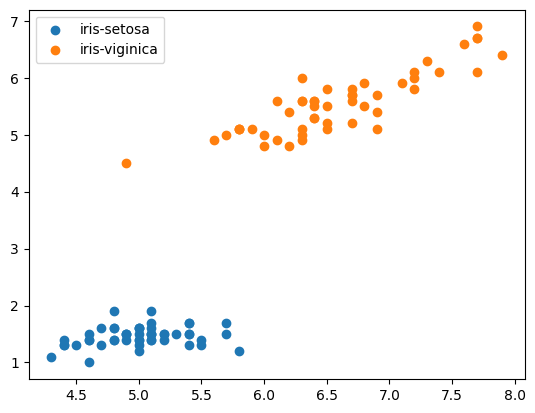

In [121]:
# 산점도 그리기
plt.scatter(X[y==0][0],X[y==0][2],label='iris-setosa')
plt.scatter(X[y==1][0],X[y==1][2],label='iris-viginica')
plt.legend()
plt.show()

In [ ]:
# 훈련
X = np.array(X)
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
ppn.erros_

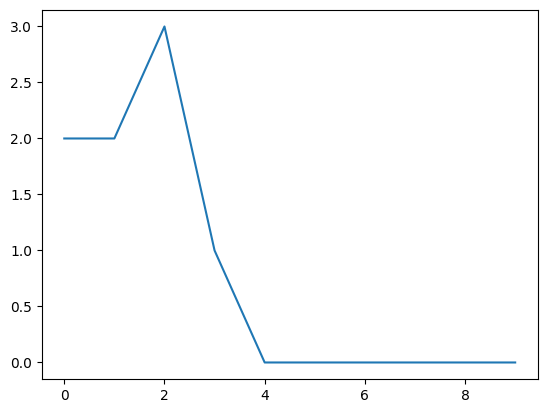

In [128]:
plt.plot(range(len(ppn.erros_)), ppn.erros_)
plt.show()

적응형 선형 뉴런 - 아달린
  - 경사하강법으로 비용함수 최소화
  - 입력특성과 가중치의 선형 조합을 계산한 후, 계산된 값에 대해서 연속적인 예측을 만든다
  - 예측괎과 실제 값 사이의 오차를 최소화 하기 위해 경사하강법을 사용해서 가중치를 조정
  - 퍼셉트론 과 유사하지만 활성화 함수가 다름...
    - 퍼셉트론은 선형분류와같이 0과 1 인데반해 아달린은 값이 연속적인 활성화 함수

In [129]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch02/figures/02_09.png', width=600)

In [130]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch02/figures/02_10.png', width=500)

In [137]:
class AdalineGD:
  def __init__(self, eta=0.01, n_iter=50,random_state=1):
    self.eta = eta
    self.n_iter=n_iter
    self.random_state=random_state
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_  = rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)

      # 2.0*X.T.dot(errors) / X.shape[0] 평균제곱오차의 기울기  , 기울기는 가중치의 변화량
      # 제곱오차 함수를 미분하면 계수가 2가 나오기 때문
      self.w_ += self.eta*2.0*X.T.dot(errors) / X.shape[0]  # 가중치를 업데이트

      self.b_ = self.eta*2.0*errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  # 활성화 함수 : 항등함수  활성화 함수의 역활은 없다..
  def activation(self, X):
    return X
  def predict(self,X):
      return np.where(self.activation(self.net_input(X))>=0.5,1,0)

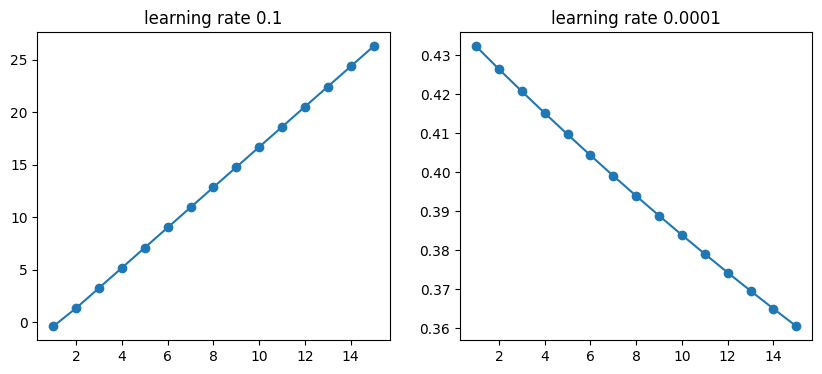

In [146]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ada1 = AdalineGD(n_iter = 15, eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o'  )
ax[0].set_title("learning rate 0.1")

ada2 = AdalineGD(n_iter = 15, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1), ada2.losses_, marker='o'  )
ax[1].set_title("learning rate 0.0001")

plt.show()

In [144]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch02/figures/02_12.png', width=700)

특성 스케일링

In [147]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch02/figures/02_13.png', width=700)

In [149]:
# (각원소 - 평균) / 표준편차
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,0].std()

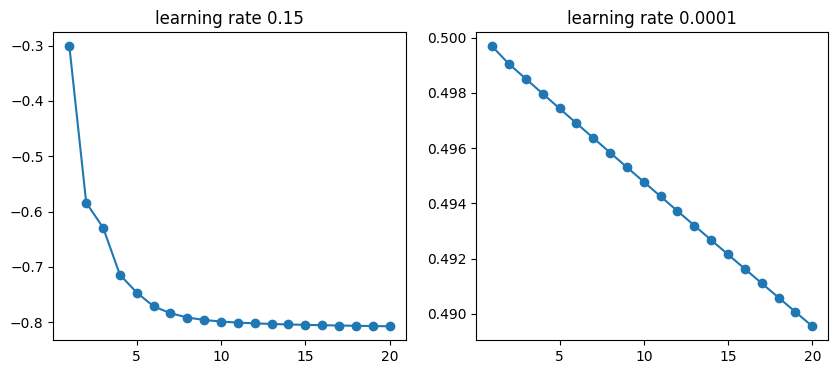

In [160]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ada1 = AdalineGD(n_iter = 20, eta=0.15).fit(X_std,y)
ax[0].plot(range(1,len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o'  )
ax[0].set_title("learning rate 0.15")

ada2 = AdalineGD(n_iter = 20, eta=0.0001).fit(X_std,y)
ax[1].plot(range(1,len(ada2.losses_)+1), ada2.losses_, marker='o'  )
ax[1].set_title("learning rate 0.0001")

plt.show()

개선

In [173]:
class AdalineGD:
  def __init__(self, eta=0.01, n_iter=50,shuffle=True, random_state=1):
    self.eta = eta
    self.n_iter=n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state=random_state

  def _initialize_weights(self, m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_  = self.rgen.normal(loc=0.0,scale=0.01,size=m)
    self.b_ = np.float_(0.)
    self.w_initialized = True

  def fit(self,X,y):
    self._initialize_weights(X.shape[1])
    self.losses_ = []

    for i in range(self.n_iter):
      if self.shuffle:
        X,y = self._shuffle(X,y)
      losses = []
      for xi,target in zip(X,y):
        losses.append(self._update_weights(xi,target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  # 가중치를 다시 초기화 하지 않고 훈련 데이터를 학습
  def partial_fit(self,X,y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X,y):
        self._update_weights(xi,target)
    else:
      self._update_weights(X,y)
    return self

  def _shuffle(self,X,y):
    r = self.rgen.permutation(len(y))
    return X[r],y[r]

  # 아달린 학습규칙을 적용해서 가중치를 업데이트
  def _update_weights(self, xi, target):

      # 2.0*X.T.dot(errors) / X.shape[0] 평균제곱오차의 기울기  , 기울기는 가중치의 변화량
      # 제곱오차 함수를 미분하면 계수가 2가 나오기 때문
      output = self.activation(self.net_input(xi))
      error = (target-output)
      self.w_ += self.eta*2.0*xi.T.dot(error) / xi.shape[0]  # 가중치를 업데이트
      # self.w_ += self.eta*2.0*xi+(error)  # 가중치를 업데이트
      self.b_ = self.eta*2.0*error
      loss = (error**2)
      return loss

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  # 활성화 함수 : 항등함수  활성화 함수의 역활은 없다..
  def activation(self, X):
    # 선형 활성화  계산
    return X
  def predict(self,X):
      return np.where(self.activation(self.net_input(X))>=0.5,1,0)

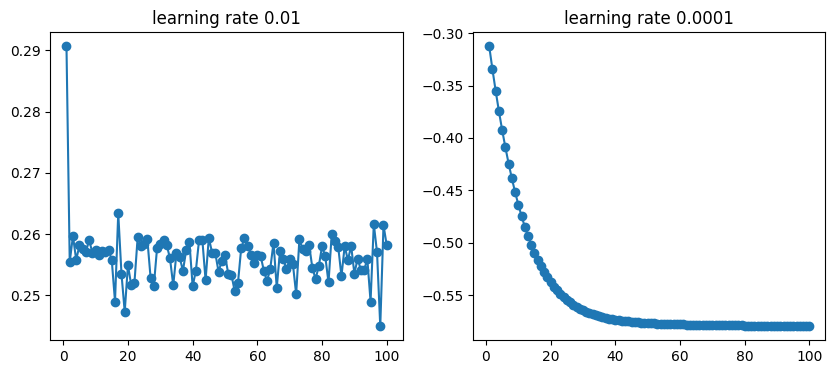

In [191]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
eta = 0.01
ada1 = AdalineGD(n_iter = 100, eta=eta).fit(X_std,y)
ax[0].plot(range(1,len(ada1.losses_)+1), ada1.losses_, marker='o'  )
ax[0].set_title("learning rate " + str(eta))

eta2 = 0.0001
ada2 = AdalineGD(n_iter = 100, eta=eta2).fit(X_std,y)
ax[1].plot(range(1,len(ada2.losses_)+1), np.log10(ada2.losses_), marker='o'  )
ax[1].set_title("learning rate " + str(eta2))

plt.show()

In [192]:
ada3 = AdalineGD(n_iter = 100, eta=eta2).partial_fit(X_std,y)